In [ ]:
#-------------------------------- Mathematics for AI -----------------------------------------#

Here’s exactly what that chapter should cover (in the right order), with what each topic is for.
________________________________________
1) Foundations (the “language”)
Sets, functions, notation
#Why: ML papers + formulas use this constantly.
You need: function mapping, domains, ranges, basic symbols.
Logarithms & exponentials
#Why: loss functions, softmax, probability, p-values.
________________________________________
2) Linear Algebra (the skeleton of ML)
Vectors & matrices
#Why: all data becomes a matrix X, all models are matrix operations.
Dot product, matrix multiplication
#Why: prediction in linear models = Xw
Norms & distance (L1, L2)
#Why: regularization, kNN, similarity.
Eigenvalues/eigenvectors (idea level)
#Why: PCA, stability, transformations.
SVD (Singular Value Decomposition)
#Why: PCA in practice, compression, embeddings.
________________________________________
3) Calculus (how models learn)
Derivatives (single variable)
#Why: slope = “how changing x changes output”.
Partial derivatives (multi-variable)
#Why: models have many parameters.
Gradients
#Why: direction to update weights.
Chain rule
#Why: backpropagation (core of deep learning).
________________________________________
4) Optimization (training = minimizing)
Gradient descent variants
•	batch, mini-batch, SGD
#Why: how training actually updates weights.
Learning rate + convergence intuition
#Why: most training problems are learning-rate problems.
Convex vs non-convex (intuition)
#Why: deep nets are non-convex; we still train them.
________________________________________
5) Probability (uncertainty + prediction)
Random variables, distributions
#Why: data is noisy; models predict under uncertainty.
Expectation, variance, covariance
#Why: bias/variance, correlation, PCA, uncertainty.
Bayes theorem (intuition)
#Why: posterior reasoning, Naive Bayes, probabilistic thinking.
________________________________________
6) Statistics (making claims from data)
Sampling, central limit theorem
#Why: why averages behave; why “n” matters.
Confidence intervals
#Why: uncertainty around metrics.
Hypothesis testing (p-values basics)
#Why: comparing models/experiments.
________________________________________
7) Information Theory (optional but powerful)
Entropy, cross-entropy, KL divergence
#Why: classification loss, model comparison, generative models.
________________________________________
8) ML-specific math “glue”
Logistic function + log loss
#Why: classification foundation.
Softmax
#Why: multi-class classification.
Regularization (L1/L2)
#Why: prevent overfitting, feature selection.
________________________________________
The best learning path (simple order)
1.	Linear algebra
2.	Probability + stats basics
3.	Calculus + optimization
4.	Information theory
5.	ML glue (log loss, softmax, regularization)



In [ ]:
1.1 What is a function? (Very important)

In AI, almost everything is a function.

#A function is just: Input → Rule → Output

In [ ]:
Example:

--Input: age
--Rule: multiply by 2
--Output: new number

In math notation:
f(x) = 2x

Why this matters for AI

A model is a function.

Example:
y = f(x)

Where:

x = input features
y = prediction
f = model

#Logistic regression, neural networks, transformers — all are just big functions.

Let’s visualize this in Python (no heavy math yet)

Run this:



In [1]:
# A simple function
def f(x):
    return 2 * x

# Try inputs
f(2), f(5), f(10)

(4, 10, 20)

In [ ]:
1.2 Domain and Range

-Domain = all possible inputs
-Range = all possible outputs

If:
f(x) = x²

Then:

-Domain: all real numbers
-Range: only ≥ 0

This matters in AI because:

--Some functions only accept certain inputs (like log, sqrt)
--Some activations have limited output ranges

In [ ]:
1.3 Linear vs Non-linear (super important)
Linear function:

f(x) = 2x
Graph = straight line

Non-linear function:

f(x) = x²
f(x) = sin(x)
f(x) = log(x)
Graph = curves

Why this matters

--If models were only linear, they’d be weak.
--Neural networks = stacking non-linear functions.

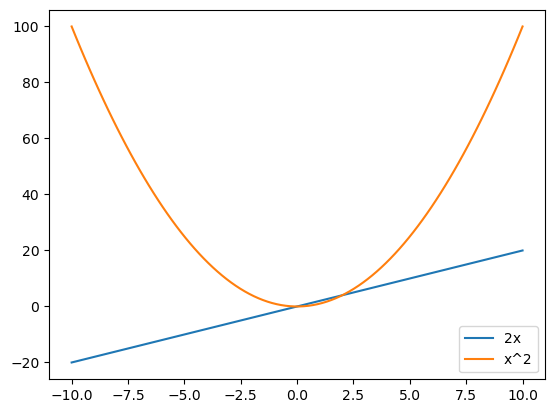

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

y1 = 2*x        # linear
y2 = x**2       # non-linear

plt.plot(x, y1, label="2x")
plt.plot(x, y2, label="x^2")
plt.legend()
plt.show()


In [ ]:
 Module 1 — Data Math Foundations for AI (Real-world, beginner)

What you will build (project)

Project: “Delivery Time Helper”

Given a new order (distance, traffic, weather…), we will:

1.	clean the dataset (missing values + outliers)
2.	compute core stats (mean/median/std/percentiles)
3.	scale features (so one feature doesn’t bully the others)
4.	find most similar past deliveries using cosine similarity
5.	predict delivery time using simple “similar-past-average” (a baby ML baseline)

This is real-world and used in:

•	ETA prediction (Swiggy/Zomato/Amazon)
•	recommender systems (similarity)
•	embeddings search (cosine similarity)



In [ ]:
Step 0 — Setup (imports)

Why

We need tools:
•	numpy = fast math
•	pandas = tables like Excel but smarter
•	matplotlib = quick graphs to see issues



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
Step 1 — Create a realistic dataset (with problems on purpose)

Why

Real data is not clean. It has:
•	missing values
•	outliers
•	noise

We’ll generate something like an operations dataset.


In [7]:
np.random.seed(7)  # WHY: makes results repeatable (same random data every run)

n = 300

# Features (inputs)
distance_km = np.random.uniform(1, 25, n)                     # 1–25 km
traffic = np.random.uniform(0.5, 2.0, n)                      # traffic multiplier
weather = np.random.choice([0, 1], size=n, p=[0.8, 0.2])       # 0=clear, 1=rain
prep_time = np.random.normal(12, 4, n).clip(3, 30)             # restaurant prep time
items = np.random.randint(1, 8, n)                             # number of items

# Target (output): delivery time (minutes)
# WHY this formula: reality = distance + traffic + weather + prep + noise
delivery_time = (
    8
    + distance_km * 2.4
    + traffic * 10
    + weather * 7
    + prep_time * 0.9
    + items * 1.2
    + np.random.normal(0, 4, n)  # noise
)

df = pd.DataFrame({
    "distance_km": distance_km,
    "traffic": traffic,
    "weather_rain": weather,
    "prep_time_min": prep_time,
    "items": items,
    "delivery_time_min": delivery_time
})

df.head()


,distance_km,traffic,weather_rain,prep_time_min,items,delivery_time_min
0,2.831399,1.907202,0,16.014220,7,53.840695
1,19.718051,1.204569,0,14.232624,1,88.666392
2,11.521822,0.508463,0,10.821232,1,56.501091
3,18.363164,1.998812,0,17.615998,6,92.750446
4,24.471748,0.571660,1,12.754601,5,85.901460


Step 2 — Inject real-world issues: missing values + outliers

Why

Because your real tickets (work life) will always have “some rows broken”.



In [9]:
# Add missing values (NaN)
for col in ["traffic", "prep_time_min"]:
    idx = np.random.choice(df.index, size=12, replace=False)
    df.loc[idx, col] = np.nan

# Add outliers (crazy values)
df.loc[np.random.choice(df.index, 3, replace=False), "distance_km"] = 120   # impossible distance
df.loc[np.random.choice(df.index, 3, replace=False), "delivery_time_min"] = 300  # insane time

df.isna().sum()


distance_km           0
traffic              12
weather_rain          0
prep_time_min        12
items                 0
delivery_time_min     0
dtype: int64

In [ ]:
What you learned:

•	NaN means missing value
•	outliers are extreme values that mess with mean/std/models



In [ ]:
Step 3 — Core statistics (the “language” of data)

3.1 Mean vs Median (super important)

Why
•	Mean gets pulled by outliers
•	Median is more “outlier-proof”



In [11]:
col = "delivery_time_min"

mean_val = df[col].mean()
median_val = df[col].median()

print("Mean  :", mean_val)
print("Median:", median_val)




Mean  : 70.81189215251646
Median: 69.17846737326805


In [ ]:
✅ If mean ≫ median, outliers probably exist.

In [ ]:
✅ If mean ≫ median, outliers probably exist. 3.2 Variance + Standard Deviation (spread)

Why

ML needs to know how spread out data is.
•	variance = average squared spread
•	std = square root of variance (same unit as data)



In [13]:
std_val = df[col].std()
var_val = df[col].var()

print("Std :", std_val)
print("Var :", var_val)


Std : 29.621114516101624
Var : 877.4104251760064


In [ ]:
3.3 Percentiles (better than mean sometimes)

Why

Percentiles tell you boundaries.
•	50th percentile = median
•	90th percentile = “most are below this”



In [15]:
p50 = df[col].quantile(0.50)
p90 = df[col].quantile(0.90)
p99 = df[col].quantile(0.99)

print("50%:", p50)
print("90%:", p90)
print("99%:", p99)


50%: 69.17846737326805
90%: 92.6781422552057
99%: 112.05630654440884


In [ ]:
Step 4 — Visual check (fast truth detector)
Why
Graphs reveal issues your eyes miss in tables.
df["delivery_time_min"].hist(bins=30)
plt.xlabel("Delivery Time (min)")
plt.ylabel("Count")
plt.show()
If you see a long tail or extreme bars → outliers.
________________________________________
Step 5 — Fix missing values (NaN)
Strategy (real-world)
•	For skew/outliers: use median
•	For normal-ish: use mean
•	For categories: use mode
We’ll use median for traffic and prep_time_min (safe choice).
df_fixed = df.copy()

for col in ["traffic", "prep_time_min"]:
    median_value = df_fixed[col].median()
    df_fixed[col] = df_fixed[col].fillna(median_value)

df_fixed.isna().sum()
Why fillna(median) works:
Median doesn’t get fooled by outliers, so it’s stable.
________________________________________
Step 6 — Fix outliers (IQR method)
Why
Outliers destroy:
•	mean/std
•	scaling
•	distance/similarity calculations
•	model training
IQR method (classic, practical):
•	IQR = Q3 − Q1
•	lower = Q1 − 1.5×IQR
•	upper = Q3 + 1.5×IQR
Then we “cap” values (winsorize) instead of deleting rows.
def cap_outliers_iqr(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return s.clip(low, high)

for col in ["distance_km", "delivery_time_min"]:
    df_fixed[col] = cap_outliers_iqr(df_fixed[col])

df_fixed[["distance_km", "delivery_time_min"]].describe()
Why capping is good:
You keep data size, but remove crazy influence.
________________________________________
Step 7 — Scaling (most important ML prep)
Why scaling exists
If one feature has big numbers, it dominates learning.
Example:
•	distance = up to 25
•	prep_time = up to 30
•	traffic = 0.5–2.0
If we later use distances/dot products/gradients, unscaled features distort everything.
7.1 Standardization (Z-score)
Formula:
z = (x − mean) / std
Result: mean ≈ 0, std ≈ 1
features = ["distance_km", "traffic", "weather_rain", "prep_time_min", "items"]
X = df_fixed[features].values

mu = X.mean(axis=0)
sigma = X.std(axis=0)

Xz = (X - mu) / sigma
7.2 Min-Max normalization
Formula:
x_norm = (x − min) / (max − min)
Result: all values in 0..1
xmin = X.min(axis=0)
xmax = X.max(axis=0)

Xmm = (X - xmin) / (xmax - xmin)
When to use what (real rule):
•	Z-score: most ML models, gradient descent, linear/logistic regression, neural nets
•	Min-max: when you want bounded values (0..1), some NN setups, some distance methods
________________________________________
Step 8 — Similarity (cosine) to find “similar past deliveries”
Why cosine similarity
This is used everywhere:
•	embeddings search (ChatGPT retrieval style)
•	recommendations
•	similarity-based predictions
Cosine similarity measures angle between vectors (pattern similarity), not size.
def cosine_similarity_matrix(A, b):
    # A: (n, d), b: (d,)
    b = b.reshape(1, -1)
    num = A @ b.T                       # dot products (n,1)
    den = np.linalg.norm(A, axis=1, keepdims=True) * np.linalg.norm(b)
    return (num / den).ravel()          # (n,)
________________________________________
Step 9 — Make the baseline predictor (real project solution)
We’ll predict delivery time for a new order by:
1.	standardize it using training mean/std
2.	find top-k similar deliveries using cosine
3.	average their delivery time
y = df_fixed["delivery_time_min"].values

# Use standardized features for similarity
A = Xz  # (n,d)

# New order scenario (you can change these values)
new_order = np.array([8.0, 1.6, 1, 14.0, 3])  # distance, traffic, rain, prep, items

# Standardize new order using same mu/sigma
new_z = (new_order - mu) / sigma

# Similarities
sims = cosine_similarity_matrix(A, new_z)

# Top k neighbors
k = 10
topk_idx = np.argsort(sims)[-k:][::-1]

pred = y[topk_idx].mean()
print("Predicted delivery time (min):", pred)

print("\nTop-10 similar deliveries (index, similarity, time):")
for i in topk_idx[:5]:
    print(i, round(sims[i], 3), round(y[i], 1))
✅ This is a legit “starter AI system”: similarity-based estimation.
________________________________________
What notes you MUST write (only these)
Write this on one page:
1.	mean vs median (median safer with outliers)
2.	std = spread
3.	percentiles (90%, 99%) for boundaries
4.	Z-score: (x − mean) / std
5.	Min-max: (x − min) / (max − min)
6.	Cosine similarity: dot(a,b) / (||a||·||b||)
That’s your “Module 1 brain”.
________________________________________
Mini tasks (we will solve as you go)
Do these inside the same notebook:
Task A
Change new_order to:
•	[3, 0.7, 0, 8, 1] (easy order)
•	[20, 1.9, 1, 20, 6] (hard order)
See predicted time difference.
Task B
Change k = 3 and k = 30
See how prediction changes (bias-variance intuition starting).
________________________________________
Module 1 complete topics covered (maximum, practical)
•	mean/median/variance/std
•	percentiles
•	missing values handling
•	outlier detection + capping (IQR)
•	scaling (z-score, min-max)
•	dot product + cosine similarity
•	real project baseline predictor using similarity



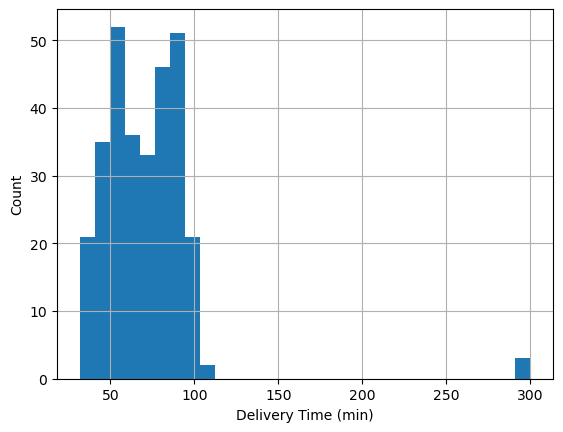

In [17]:
df["delivery_time_min"].hist(bins=30)
plt.xlabel("Delivery Time (min)")
plt.ylabel("Count")
plt.show()

In [ ]:
What notes you MUST write (only these)
Write this on one page:
1.	mean vs median (median safer with outliers)
2.	std = spread
3.	percentiles (90%, 99%) for boundaries
4.	Z-score: (x − mean) / std
5.	Min-max: (x − min) / (max − min)
6.	Cosine similarity: dot(a,b) / (||a||·||b||)
That’s your “Module 1 brain”.

In [ ]:
Module 2 — Linear Algebra for AI (with a real project)

Why we need this in AI (simple truth)

In AI, everything becomes a vector (list of numbers):
•	an image → vector of pixel values (or features)
•	a sentence → embedding vector (e.g., 768 numbers)
•	a user profile → vector of behavior features
Models are mostly matrix multiplications:
•	neural net layer = X @ W + b
•	attention = Q @ K.T then softmax, then @ V
•	PCA = rotate/transform data to a better coordinate system
So you learn linear algebra to answer:
•	“What is the shape?”
•	“Why is this multiply possible?”
•	“Why does scaling/rotation change results?”
•	“How do embeddings similarity and compression work?”
________________________________________
Core topics you must learn in Module 2

1) Shapes (most important skill)
•	scalar: ()
•	vector: (d,)
•	matrix: (n, d)
•	“dataset”: X is usually (n_samples, n_features)
2) Vector ops
•	add/subtract, multiply by scalar
•	dot product
•	norm (length)
3) Matrix ops
•	transpose
•	matrix multiply (@)
•	why shapes must match
4) Projection intuition
•	projecting onto a direction = “keep only what matters along that direction”
5) PCA using SVD
•	SVD is the safest practical way
•	PCA compresses dimensions while keeping most signal
________________________________________
Real-world AI Project (best practical one)

Project: Compress embeddings using PCA and check that search still works

This is exactly what happens in:
•	retrieval systems (search)
•	vector databases / embeddings storage optimization
•	speeding up similarity search
We’ll make:
1.	a fake “embedding dataset” (like 50-dim vectors)
2.	compress it to 10 dims using PCA
3.	run cosine-similarity search in both
4.	compare how many “top results” overlap
________________________________________
Step 1 — Create “embedding-like” data

Why
Real embeddings have structure (not random noise). So we generate data with hidden factors.
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n = 800     # number of items (documents/products)
d = 50      # original embedding dimension
k_true = 6  # hidden factors (real structure)

# Hidden factor representation (n x k_true)
Z = np.random.randn(n, k_true)

# Random mixing matrix to create embeddings (k_true x d)
A = np.random.randn(k_true, d)

# Embeddings (n x d) with a bit of noise
X = Z @ A + 0.2 * np.random.randn(n, d)

print("X shape:", X.shape)  # should be (800, 50)
What you learned:
X is a matrix: 800 items, each has 50 numbers.
________________________________________


In [ ]:
Step 2 — Tiny linear algebra essentials (dot, norm, cosine)

Why
Cosine similarity is used for embeddings search everywhere.
def cosine_sim_matrix(A, b):
    """
    A: (n, d)
    b: (d,)
    returns: (n,) cosine similarities
    """
    num = A @ b                      # dot with each row (n,)
    den = np.linalg.norm(A, axis=1) * np.linalg.norm(b)
    return num / den

# test: pick one vector and compare with all
idx = 10
sims = cosine_sim_matrix(X, X[idx])
print("Most similar index should be itself:", np.argmax(sims))
Why A @ b works:
A has rows (vectors). Dot product with b gives similarity signal.
________________________________________
Step 3 — PCA using SVD (the real tool)

Why PCA
Embeddings might be 768 dims, 1536 dims, etc. PCA can compress while keeping signal.
Why SVD
Numerically stable and standard.
PCA steps (must memorize):
1.	center the data: Xc = X - mean
2.	do SVD: Xc = U S Vᵀ
3.	take first k directions from Vᵀ
4.	project: Xk = Xc @ Vk
# 1) Center
X_mean = X.mean(axis=0)
Xc = X - X_mean

# 2) SVD
U, S, Vt = np.linalg.svd(Xc, full_matrices=False)

# Explained variance ratio (how much signal each component holds)
explained = (S**2) / np.sum(S**2)

print("Top 10 variance ratios:", explained[:10])
print("Variance captured by first 10:", explained[:10].sum())

# 3) Choose reduced dimension
k = 10
Vk = Vt[:k].T          # (d x k)

# 4) Project to k dims
Xk = Xc @ Vk           # (n x k)
print("Reduced shape:", Xk.shape)
What you learned (super important):
•	Vt[:k] are the top “directions” (principal components)
•	multiplying Xc @ Vk gives compressed embeddings
________________________________________
Step 4 — Search before vs after compression

Why
We want to know if PCA compression keeps “nearest neighbors” similar.
def top_k_indices(sim, topk=10):
    return np.argsort(sim)[-topk:][::-1]

query_idx = 123
q_original = X[query_idx]
q_reduced  = Xk[query_idx]

# Similarity search in original space
sim_orig = cosine_sim_matrix(X, q_original)
top_orig = top_k_indices(sim_orig, topk=10)

# Similarity search in reduced space
sim_red = cosine_sim_matrix(Xk, q_reduced)
top_red = top_k_indices(sim_red, topk=10)

overlap = len(set(top_orig) & set(top_red))

print("Top-10 overlap count:", overlap)
print("Original top-10:", top_orig)
print("Reduced  top-10:", top_red)
Interpretation (Babu-friendly):
•	Overlap close to 10 = compression kept search results almost same
•	Overlap low = too much info lost (k too small)
________________________________________
Step 5 — Pick the best k (tiny experiment)

Why
This is what AI engineers actually do: choose compression based on tradeoff.
def pca_reduce(X, k):
    Xc = X - X.mean(axis=0)
    U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
    Vk = Vt[:k].T
    Xk = Xc @ Vk
    explained = (S**2) / np.sum(S**2)
    return Xk, explained[:k].sum()

ks = [2, 5, 10, 20, 30]
for kk in ks:
    Xkk, var = pca_reduce(X, kk)
    sim_orig = cosine_sim_matrix(X, X[query_idx])
    sim_red  = cosine_sim_matrix(Xkk, Xkk[query_idx])
    top_orig = top_k_indices(sim_orig, 10)
    top_red  = top_k_indices(sim_red, 10)
    overlap = len(set(top_orig) & set(top_red))
    print(f"k={kk:2d}  variance={var:.3f}  top10_overlap={overlap}")
You’ll see a pattern:
•	higher k → more variance → better overlap
•	lower k → faster storage/search but more loss

The “WHY” behind each key concept (quick, clear)

Vector: one item represented as numbers

Matrix: many vectors stacked

Transpose (.T): flips rows/cols; needed for dot products like Q @ K.T

Matrix multiply (@): apply transformations / combine features

Projection: keep only certain directions (signal)

PCA: find best directions automatically; reduce dimensions

SVD: engine that finds those best directions

Notes you MUST write (only the useful ones)

Shapes rule: (n,d) @ (d,k) → (n,k)

Cosine similarity: dot(a,b) / (||a||·||b||)

PCA steps: center → SVD → take top k → project

Variance captured ≈ “how much info kept”

In [ ]:
Module 3 — Calculus + Optimization for AI
Why we need this in AI (simple)
Training an AI model = minimize a number called loss.
•	Loss is “how wrong the model is”.
•	Learning is “changing parameters so loss goes down”.
Calculus gives the gradient (slope direction).
Optimization uses that gradient to update weights.
Without this, you’ll always feel like: “model trains… but why?”
________________________________________
Concepts you MUST learn (maximum + practical)
A) Function
A rule: input → output
Example: y = w*x + b
B) Loss function
A function that measures error.
•	Regression: MSE (mean squared error)
•	Classification: cross-entropy (log loss)
C) Derivative (slope)
Derivative tells: if I change w a little, how much does loss change?
D) Gradient (many slopes)
If model has many weights: gradient is a vector of partial derivatives:
•	∂loss/∂w1, ∂loss/∂w2, …
E) Gradient Descent (learning rule)
Update weights to reduce loss:
params = params − learning_rate × gradient
F) Learning rate
Step size. Too big → explosions. Too small → slow.
G) Variants used in real ML
•	Batch GD (uses all data)
•	SGD (one row at a time)
•	Mini-batch (best practical default)
H) Regularization (avoid overfitting)
L2 penalty keeps weights small.
________________________________________
Real-world project (best practical)
Project: “Delivery Delay Risk Predictor” (Binary Classification)
We will predict: Will delivery be delayed? (Yes/No)
From features:
•	distance_km
•	traffic
•	rain
•	prep_time
•	items
Label (target):
•	delay = 1 if delivery_time > threshold (like 45 min)
•	else 0
And we’ll train a Logistic Regression model from scratch using Gradient Descent.
This is legit real-world: risk scoring, churn prediction, fraud detection, SLA breach prediction.
________________________________________
Step 1 — Create realistic data
Why
You learn best when data looks like real life.
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)
n = 600

distance = np.random.uniform(1, 25, n)
traffic  = np.random.uniform(0.5, 2.0, n)
rain     = np.random.choice([0, 1], size=n, p=[0.8, 0.2])
prep     = np.random.normal(12, 4, n).clip(3, 30)
items    = np.random.randint(1, 8, n)

# Real-ish delivery time (minutes)
delivery_time = (
    8 + distance*2.5 + traffic*10 + rain*7 + prep*0.9 + items*1.2
    + np.random.normal(0, 4, n)
)

# Binary label: delayed or not (threshold)
delay = (delivery_time > 45).astype(int)

X = np.column_stack([distance, traffic, rain, prep, items])   # (n,5)
y = delay                                                     # (n,)

print("X shape:", X.shape, "y mean (delay rate):", y.mean())
________________________________________
Step 2 — Scale features (important for gradient descent)
Why
Gradient descent hates uneven scales. Scaling makes training stable and fast.
mu = X.mean(axis=0)
sigma = X.std(axis=0)
Xz = (X - mu) / sigma
________________________________________
Step 3 — Learn the model: Logistic Regression
Why logistic regression
It outputs probability: P(delay=1).
Sigmoid function
Turns any number into 0..1 probability.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
Model:
•	p = sigmoid(X @ w + b)
•	prediction: p > 0.5
________________________________________
Step 4 — Loss for classification: Cross-Entropy
Why not MSE for classification
Cross-entropy strongly punishes confident wrong predictions and trains faster.
def log_loss(y, p, eps=1e-9):
    p = np.clip(p, eps, 1 - eps)
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))
________________________________________
Step 5 — Gradients (the calculus part)
Why gradients matter
Gradient tells the direction to reduce loss.
For logistic regression, gradients are:
•	dw = (X.T @ (p - y)) / n
•	db = mean(p - y)
(You don’t need to “prove” this now; you just need to use it correctly.)
________________________________________
Step 6 — Train with Gradient Descent (with L2 regularization)
Why L2 regularization
Prevents weights from becoming huge → reduces overfitting.
def train_logreg_gd(X, y, lr=0.1, steps=2000, l2=0.0):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    losses = []

    for t in range(steps):
        z = X @ w + b
        p = sigmoid(z)

        # loss + L2 penalty
        loss = log_loss(y, p) + 0.5*l2*np.sum(w*w)
        losses.append(loss)

        # gradients
        err = (p - y)                         # (n,)
        dw = (X.T @ err) / n + l2*w            # (d,)
        db = err.mean()

        # update step
        w -= lr * dw
        b -= lr * db

        if t % 400 == 0:
            print(t, "loss:", round(loss, 4))

    return w, b, np.array(losses)

w, b, losses = train_logreg_gd(Xz, y, lr=0.15, steps=2000, l2=0.01)
print("Trained w:", w, "b:", b)
________________________________________
Step 7 — Evaluate (accuracy + precision/recall)
Why not only accuracy
If delays are rare, accuracy can lie. Precision/recall tell truth.
def predict_proba(X, w, b):
    return sigmoid(X @ w + b)

def predict_label(X, w, b, thr=0.5):
    return (predict_proba(X, w, b) >= thr).astype(int)

def metrics(y_true, y_pred):
    tp = np.sum((y_true==1) & (y_pred==1))
    tn = np.sum((y_true==0) & (y_pred==0))
    fp = np.sum((y_true==0) & (y_pred==1))
    fn = np.sum((y_true==1) & (y_pred==0))

    acc = (tp + tn) / (tp + tn + fp + fn)
    prec = tp / (tp + fp + 1e-9)
    rec = tp / (tp + fn + 1e-9)
    return acc, prec, rec, (tp, fp, fn, tn)

yhat = predict_label(Xz, w, b, thr=0.5)
acc, prec, rec, counts = metrics(y, yhat)
print("Accuracy:", round(acc, 3), "Precision:", round(prec, 3), "Recall:", round(rec, 3))
print("TP,FP,FN,TN:", counts)
________________________________________
Step 8 — See training improving (loss curve)
Why plot
Your eyes catch problems instantly (bad learning rate, stuck training).
plt.plot(losses)
plt.xlabel("Step")
plt.ylabel("Loss")
plt.show()
________________________________________
Mini “Babu” Experiments (these teach you fast)
Experiment 1: Learning rate explosion
Run training with lr=1.0 and watch loss go crazy.
_ = train_logreg_gd(Xz, y, lr=1.0, steps=300, l2=0.01)
Experiment 2: Underfitting vs overfitting feel
•	try l2=0.0 and l2=0.2 and compare metrics
Higher L2 usually reduces over-confidence.
w1,b1,_ = train_logreg_gd(Xz, y, lr=0.15, steps=1200, l2=0.0)
w2,b2,_ = train_logreg_gd(Xz, y, lr=0.15, steps=1200, l2=0.2)

for name, ww, bb in [("l2=0.0", w1, b1), ("l2=0.2", w2, b2)]:
    yp = predict_label(Xz, ww, bb)
    acc, prec, rec, _ = metrics(y, yp)
    print(name, "acc:", round(acc,3), "prec:", round(prec,3), "rec:", round(rec,3))
________________________________________
The “notes you must write” (tiny and deadly useful)
1.	Gradient Descent: params = params - lr * gradient
2.	Sigmoid: 1 / (1 + exp(-z))
3.	Cross-entropy: punishes confident wrong answers
4.	Scaling helps gradient descent
5.	L2 regularization: adds l2*w to gradient
________________________________________
What Module 3 just gave you (real AI engineer muscle)
•	You trained a model from scratch
•	You saw how loss + gradient + learning rate control learning
•	You used classification loss (cross-entropy)
•	You evaluated like a grown-up (precision/recall, not only accuracy)



In [ ]:
Module 4 — Probability + Statistics for AI (Real-world)
Why we need this in AI
Because real life is noisy:
•	users behave randomly
•	sensors are imperfect
•	labels are wrong sometimes
•	data shifts over time
Probability helps you answer:
•	“How confident is this prediction?”
•	“What’s the chance of delay given rain + high traffic?”
•	“How do we combine evidence?”
•	“Why do we use log probabilities?”
Statistics helps you answer:
•	“Is this improvement real or luck?” (A/B testing)
•	“What’s the distribution / uncertainty?”
•	“How to evaluate models properly?”
________________________________________
Topics you MUST learn in Module 4 (maximum + practical)
A) Probability basics
•	events, probability, independent vs dependent
•	conditional probability: P(A|B)
B) Bayes rule (core AI idea)
•	update belief using evidence
P(A|B) = P(B|A)P(A) / P(B)
C) Distributions you actually need
•	Bernoulli (yes/no), Binomial (count), Normal (noise), Poisson (rare events)
D) Expectation & variance (average + uncertainty)
•	expected value = long-run average
E) Log probabilities (super important)
Multiplying tiny probabilities underflows → use logs to add.
F) Evaluation metrics
•	accuracy, precision, recall, F1
•	threshold tuning (0.5 is not magic)
G) A/B test intuition (basic)
•	“is this improvement statistically meaningful?”
________________________________________
Real-world project (best practical)
Project: Spam Detector (Naive Bayes) + Confidence + Threshold
This is classic and still used:
•	spam filtering
•	ticket routing
•	document classification
•	keyword-based triage
We will:
1.	train a Naive Bayes spam classifier from scratch
2.	use log-probabilities (real-world method)
3.	produce probability-like scores
4.	tune threshold to control false positives
________________________________________
Step 1 — Training dataset (toy but real logic)
import numpy as np
from collections import Counter
import re

spam_texts = [
    "win money now",
    "cheap meds available",
    "claim your prize now",
    "limited offer win big",
    "free gift claim now"
]

ham_texts = [
    "meeting at noon",
    "project update attached",
    "can we reschedule the call",
    "lunch tomorrow?",
    "please review the document"
]

def tokenize(text):
    # WHY: simple tokenizer for learning (real projects use better tokenizers)
    return re.findall(r"[a-z']+", text.lower())

spam_tokens = [w for t in spam_texts for w in tokenize(t)]
ham_tokens  = [w for t in ham_texts  for w in tokenize(t)]

spam_counts = Counter(spam_tokens)
ham_counts  = Counter(ham_tokens)

vocab = sorted(set(spam_counts) | set(ham_counts))
V = len(vocab)

spam_total = sum(spam_counts.values())
ham_total  = sum(ham_counts.values())

print("Vocab size:", V)
print("Spam words:", spam_counts.most_common(5))
print("Ham  words:", ham_counts.most_common(5))
________________________________________
Step 2 — Priors (base rates)
Why
If 90% emails are ham, model should start biased toward ham unless evidence says otherwise.
P_spam = len(spam_texts) / (len(spam_texts) + len(ham_texts))
P_ham  = 1 - P_spam

logP_spam = np.log(P_spam)
logP_ham  = np.log(P_ham)

print("P_spam:", P_spam, "P_ham:", P_ham)
________________________________________
Step 3 — Likelihoods with Laplace smoothing
Why smoothing
If a word never appeared in spam, probability becomes 0 and kills the whole product.
Smoothing prevents “zero-probability death”.
Laplace smoothing:
P(word|class) = (count + alpha) / (total_words + alpha*V)
alpha = 1.0

def log_prob_word_given_class(word, counts, total, V, alpha=1.0):
    return np.log((counts.get(word, 0) + alpha) / (total + alpha * V))
________________________________________
Step 4 — Score an email using log-probabilities
Why logs
Multiplying many tiny probabilities → underflow.
So we do: log(a*b*c) = log(a)+log(b)+log(c).
def score_email(text):
    words = tokenize(text)

    s_spam = logP_spam
    s_ham  = logP_ham

    for w in words:
        s_spam += log_prob_word_given_class(w, spam_counts, spam_total, V, alpha)
        s_ham  += log_prob_word_given_class(w, ham_counts,  ham_total,  V, alpha)

    return s_spam, s_ham

def predict(text, threshold=0.0):
    # threshold is on log-odds difference: spam if (s_spam - s_ham) > threshold
    s_spam, s_ham = score_email(text)
    diff = s_spam - s_ham
    label = "SPAM" if diff > threshold else "HAM"
    return label, diff, s_spam, s_ham
________________________________________
Step 5 — Test it
tests = [
    "win a free prize now",
    "please review the project document",
    "limited offer meds free",
    "can we have lunch tomorrow",
]

for t in tests:
    label, diff, s_spam, s_ham = predict(t, threshold=0.0)
    print(f"{t!r:35} -> {label:4}  log_diff={diff:.3f}")
________________________________________
Add “confidence” (soft probability)
Naive Bayes gives log-scores. We can convert difference to a “probability-ish” value:
If diff = log(Pspam) - log(Pham) then:
P(spam) ≈ sigmoid(diff)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for t in tests:
    label, diff, *_ = predict(t)
    pspam = sigmoid(diff)
    print(f"{t!r:35} -> {label:4}  P(spam)≈{pspam:.2f}")
________________________________________
Threshold tuning (real-world control)
Why threshold matters
•	In business, false positives (marking important mail as spam) are costly.
•	So you raise threshold to be more conservative.
thresholds = [-2, -1, 0, 1, 2]

text = "free prize now"
for thr in thresholds:
    label, diff, *_ = predict(text, threshold=thr)
    print("threshold:", thr, "->", label, "diff:", round(diff,3))
________________________________________
Statistics mini: “Is improvement real?” (tiny A/B test intuition)
If version A accuracy = 0.80 and version B = 0.82, is that real or luck?
Quick practical check: simulate uncertainty using bootstrap.
import numpy as np

np.random.seed(0)

# Suppose you tested on 200 emails:
A_correct = np.random.binomial(1, 0.80, 200)
B_correct = np.random.binomial(1, 0.82, 200)

def bootstrap_mean(arr, B=2000):
    n = len(arr)
    means = []
    for _ in range(B):
        sample = np.random.choice(arr, size=n, replace=True)
        means.append(sample.mean())
    return np.array(means)

A_boot = bootstrap_mean(A_correct)
B_boot = bootstrap_mean(B_correct)

diff = B_boot - A_boot
print("Estimated mean improvement:", diff.mean())
print("95% interval:", np.quantile(diff, 0.025), "to", np.quantile(diff, 0.975))
If the 95% interval includes 0 → improvement might be luck.
________________________________________
Notes you MUST write (only the useful ones)
1.	Conditional probability: P(A|B)
2.	Bayes rule: P(A|B)=P(B|A)P(A)/P(B)
3.	Laplace smoothing prevents zero probability
4.	Use logs to avoid underflow
5.	Threshold controls false positives/negatives
6.	Accuracy can lie; use precision/recall
________________________________________
What Module 4 gives you (AI engineer reality)
•	You can build a probabilistic classifier (Naive Bayes)
•	You understand why logs are everywhere
•	You can tune thresholds based on business risk
•	You can judge if an improvement is real (basic stats thinking)

